In [4]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combos
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the print function to display the lat/long combos
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-84.34731654384485 -129.46660594868973
-65.64261384892939 -159.96218773475496
-60.876847378542244 121.4486771941909
15.740054292676533 97.31648530778483
-60.701915209023326 -79.82487617977694
-71.00271483983377 -70.89239581764662
16.421201870503594 -23.005643034132163
-31.03563263061927 -122.40072516403293
53.92274901842089 91.7599797379346
-63.09786522671305 -115.17141858734345
49.8947011617895 149.51540666005525
38.66721146573525 143.9663140865901
44.949797581520215 77.61131960771792
-32.76388273968861 -143.25330499506063
-44.63039758505715 22.37092879826028
-42.85760188497015 144.83572592149073
-73.70117357376434 -11.591781923597239
21.933845251369434 -120.06805568774524
48.927259374643455 -31.34136202854475
15.412667672636388 121.93593014851109
7.581159178194852 -41.676312585502956
36.05123266384442 55.29733698501633
-78.19584060791118 -47.5929316684344
58.47674829245909 163.3196029690664
27.02243001881375 -99.02714613889437
76.7153173180105 131.57635430212815
-73.50670101994652 -1

In [8]:
from citipy import citipy

In [9]:
# Create a list to hold the cities
cities = []

# Identify the nearest city for each lat/long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, we will add it to cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient total
len(cities)

581

In [10]:
# 6.2.6 Get City Weather Data - mult cities
import requests
from config import weather_api_key
import time
from datetime import datetime

In [11]:
# Create empty list to hold weather data
city_data = []

# Build basic url 
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+ weather_api_key

In [12]:
# Print the beginning of the logging
print("Beginning data retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all cities in our list
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    

  
    # Log the URL, record, and set numbers, and the city
    print(f"Processing record {record_count} of Set {set_count} | {city}")
    
    # add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
    
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp =  city_weather["main"]["temp_max"]
        city_humidity =  city_weather["main"]["humidity"]

        city_clouds =  city_weather["clouds"]["all"]

        city_wind = city_weather["wind"]["speed"]

        city_country = city_weather["sys"]["country"]

        # Conver the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M%S")

         # Append the city information into city_data list

        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lon,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Clouds": city_clouds,
                          "Wind": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    

# If an error is experienced, skip the city
    except:
            print("City not found. Skipping...")
            pass
    
# Indicate that data loading is complete
print("-----------------------------")
print("Data retrieval complete      ")
print("-----------------------------")
                             


Beginning data retrieval     
-----------------------------
Processing record 1 of Set 1 | rikitea
Processing record 2 of Set 1 | mataura
Processing record 3 of Set 1 | albany
Processing record 4 of Set 1 | kyaikkami
Processing record 5 of Set 1 | punta arenas
Processing record 6 of Set 1 | ushuaia
Processing record 7 of Set 1 | santa maria
Processing record 8 of Set 1 | minusinsk
Processing record 9 of Set 1 | vostok
Processing record 10 of Set 1 | kamaishi
Processing record 11 of Set 1 | ushtobe
Processing record 12 of Set 1 | bredasdorp
Processing record 13 of Set 1 | burnie
Processing record 14 of Set 1 | cape town
Processing record 15 of Set 1 | guerrero negro
Processing record 16 of Set 1 | lagoa
Processing record 17 of Set 1 | carlagan
Processing record 18 of Set 1 | carutapera
Processing record 19 of Set 1 | shahrud
Processing record 20 of Set 1 | ossora
Processing record 21 of Set 1 | guerrero
Processing record 22 of Set 1 | tiksi
Processing record 23 of Set 1 | kapaa
Processi

In [13]:
len(city_data)

534

In [14]:
# Convert the array of dictionaries to a Pd DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind,Country,Date
0,Rikitea,-23.1203,-134.9692,67.93,64,0,17.52,PF,2022-10-12 20:1911
1,Mataura,-46.1927,168.8643,44.96,69,98,0.85,NZ,2022-10-12 20:1912
2,Albany,42.6001,-73.9662,68.88,48,100,3.00,US,2022-10-12 20:1535
3,Kyaikkami,16.0800,97.5675,79.18,77,6,3.31,MM,2022-10-12 20:1715
4,Punta Arenas,-53.1500,-70.9167,41.02,70,40,29.93,CL,2022-10-12 20:1703
5,Ushuaia,-54.8000,-68.3000,37.06,87,100,27.63,AR,2022-10-12 20:1914
6,Santa Maria,-29.6842,-53.8069,70.90,56,1,5.73,BR,2022-10-12 20:1823
7,Minusinsk,53.7103,91.6875,41.99,84,100,9.98,RU,2022-10-12 20:1915
8,Vostok,46.4856,135.8833,31.82,78,32,4.56,RU,2022-10-12 20:1916
9,Kamaishi,39.2667,141.8833,58.68,73,100,5.53,JP,2022-10-12 20:1916


In [15]:
reorder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Clouds", "Wind"]
city_data_df = city_data_df[reorder]

In [16]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Clouds,Wind
0,Rikitea,PF,2022-10-12 20:1911,-23.1203,-134.9692,67.93,64,0,17.52
1,Mataura,NZ,2022-10-12 20:1912,-46.1927,168.8643,44.96,69,98,0.85
2,Albany,US,2022-10-12 20:1535,42.6001,-73.9662,68.88,48,100,3.00
3,Kyaikkami,MM,2022-10-12 20:1715,16.0800,97.5675,79.18,77,6,3.31
4,Punta Arenas,CL,2022-10-12 20:1703,-53.1500,-70.9167,41.02,70,40,29.93
...,...,...,...,...,...,...,...,...,...
529,The Valley,AI,2022-10-12 20:3633,18.2170,-63.0578,86.14,74,40,11.50
530,Dabat,ET,2022-10-12 20:3633,12.9842,37.7650,56.16,69,59,3.18
531,Tandalti,SD,2022-10-12 20:3634,13.0167,31.8667,86.40,45,91,13.11
532,Beloha,MG,2022-10-12 20:3635,-25.1667,45.0500,69.42,82,0,5.12


In [17]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export city_data into CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [18]:
# 6.3.1 get data to plot
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Clouds"]
wind_speed = city_data_df["Wind"]

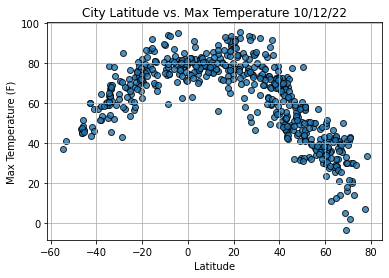

In [19]:
# Import time module
import time

# Build the scatter plot for lat v max temp
plt.scatter(lats,
            max_temps,
            edgecolor = "black",
            linewidths = 1,
            marker = "o",
            alpha = 0.8,
            label = "Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

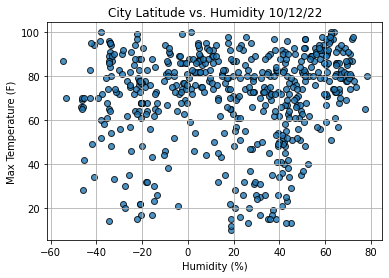

In [20]:
# Build the scatter plot for lat v humidity
plt.scatter(lats,
            humidity,
            edgecolor = "black",
            linewidths = 1,
            marker = "o",
            alpha = 0.8,
            label = "Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

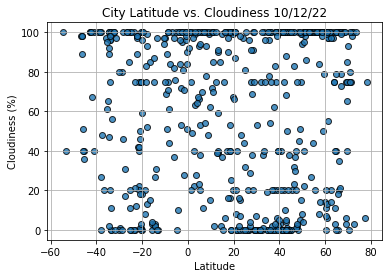

In [21]:
# Build the scatter plot for lat v cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor = "black",
            linewidths = 1,
            marker = "o",
            alpha = 0.8,
            label = "Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

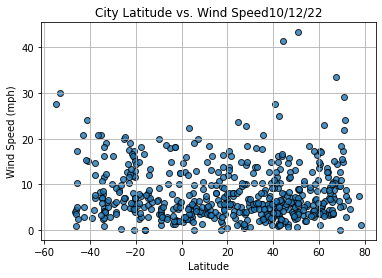

In [22]:
# Build the scatter plot for lat v wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor = "black",
            linewidths = 1,
            marker = "o",
            alpha = 0.8,
            label = "Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [87]:
# 6.4.2  Create Linear Regression Function
# Import linear regression
from scipy.stats import linregress

# Create a function to perform linear regression on weather data
# and plot a regression line and equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_eff) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    # Create a scatter plt with the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation and put in formatting
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "r")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
                        

In [88]:
# Create hemisphere data frames
index13 = city_data_df.loc[13]
index13

City                 Cape Town
Country                     ZA
Date        2022-10-12 20:1712
Lat                   -33.9258
Lng                    18.4232
Max Temp                 64.27
Humidity                    84
Clouds                      75
Wind                     16.11
Name: 13, dtype: object

In [89]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [90]:
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Clouds,Wind
2,Albany,US,2022-10-12 20:1535,42.6001,-73.9662,68.88,48,100,3.00
3,Kyaikkami,MM,2022-10-12 20:1715,16.0800,97.5675,79.18,77,6,3.31
7,Minusinsk,RU,2022-10-12 20:1915,53.7103,91.6875,41.99,84,100,9.98
8,Vostok,RU,2022-10-12 20:1916,46.4856,135.8833,31.82,78,32,4.56
9,Kamaishi,JP,2022-10-12 20:1916,39.2667,141.8833,58.68,73,100,5.53
...,...,...,...,...,...,...,...,...,...
528,Aviles,ES,2022-10-12 20:3632,43.5547,-5.9248,63.18,90,20,2.30
529,The Valley,AI,2022-10-12 20:3633,18.2170,-63.0578,86.14,74,40,11.50
530,Dabat,ET,2022-10-12 20:3633,12.9842,37.7650,56.16,69,59,3.18
531,Tandalti,SD,2022-10-12 20:3634,13.0167,31.8667,86.40,45,91,13.11


In [91]:
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Clouds,Wind
0,Rikitea,PF,2022-10-12 20:1911,-23.1203,-134.9692,67.93,64,0,17.52
1,Mataura,NZ,2022-10-12 20:1912,-46.1927,168.8643,44.96,69,98,0.85
4,Punta Arenas,CL,2022-10-12 20:1703,-53.1500,-70.9167,41.02,70,40,29.93
5,Ushuaia,AR,2022-10-12 20:1914,-54.8000,-68.3000,37.06,87,100,27.63
6,Santa Maria,BR,2022-10-12 20:1823,-29.6842,-53.8069,70.90,56,1,5.73
...,...,...,...,...,...,...,...,...,...
507,Zambezi,ZM,2022-10-12 20:3618,-13.5432,23.1047,73.96,26,97,4.63
508,Esperance,AU,2022-10-12 20:3618,-33.8667,121.9000,54.19,64,98,18.07
516,Arica,CL,2022-10-12 20:3624,-18.4750,-70.3042,69.35,63,75,14.97
527,Rio Grande,BR,2022-10-12 20:3632,-32.0350,-52.0986,73.51,74,0,6.55


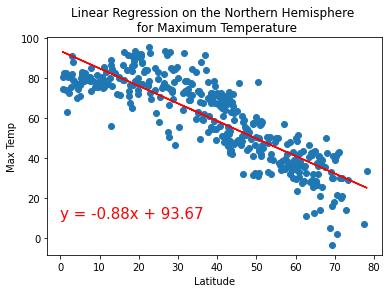

LinregressResult(slope=-0.8767206881925982, intercept=93.66677639568684, rvalue=-0.8489267032440376, pvalue=5.93142471459181e-104, stderr=0.028452527484687316, intercept_stderr=1.2350071736415118)


In [92]:
# Perform linear regression on max temp for northern hemi
# x values are latitude, y values are max temp

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regress_values = linregress(x_values, y_values)

# Call the function we created
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp", (0,10))
print(regress_values)

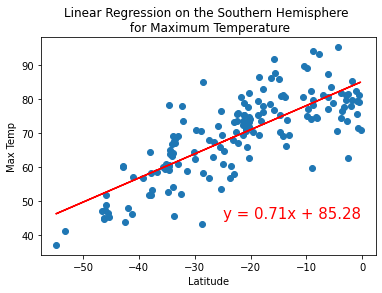

LinregressResult(slope=0.7120081017362987, intercept=85.27675123068708, rvalue=0.7794220126951946, pvalue=1.009662998945147e-34, stderr=0.04496507531663919, intercept_stderr=1.1600973811625328)

In [93]:
# Create same plot for southern hemisphere

x_val_south = southern_hemi_df["Lat"]
y_val_south = southern_hemi_df["Max Temp"]
regress_values = linregress(x_val_south, y_val_south)



plot_linear_regression(x_val_south, y_val_south, "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp", (-25,45))
regress_values 

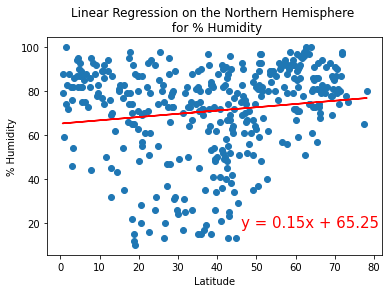

LinregressResult(slope=0.14865088743775456, intercept=65.24878700420314, rvalue=0.13940159064016763, pvalue=0.007242257554833224, stderr=0.05504457816514606, intercept_stderr=2.38925870260954)

In [106]:
# Linear Regression for Humidity  - Northern Hemi
x_val_north = northern_hemi_df["Lat"]
y_val_north = northern_hemi_df["Humidity"]
regress_values_n = linregress(x_val_north, y_val_north)

plot_linear_regression(x_val_north, y_val_north, "Linear Regression on the Northern Hemisphere \n for % Humidity", "% Humidity", (46, 18))
regress_values_n

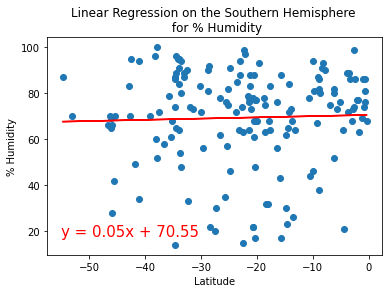

LinregressResult(slope=0.05313442363499331, intercept=70.55340021568537, rvalue=0.033620862922372555, pvalue=0.6690991222944109, stderr=0.12409778126946894, intercept_stderr=3.2017184458160517)

In [107]:
# Linear Regression for Humidity  - Southern Hemi
x_val_south = southern_hemi_df["Lat"]
y_val_south = southern_hemi_df["Humidity"]
regress_values_s = linregress(x_val_south, y_val_south)

plot_linear_regression(x_val_south, y_val_south, "Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity", (-55, 18))
regress_values_s

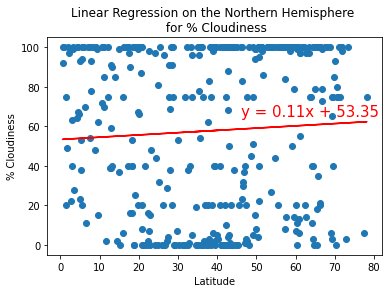

LinregressResult(slope=0.11476143805443223, intercept=53.34776612609562, rvalue=0.0565212034433696, pvalue=0.2781895202471919, stderr=0.10567344187685425, intercept_stderr=4.586849405612254)

In [110]:
# 6.4.4 Correlation between Latitude and % Cloudiness
# Linear Regression for Cloudiness  - Northern Hemi
x_val_north = northern_hemi_df["Lat"]
y_val_north = northern_hemi_df["Clouds"]
regress_values_n = linregress(x_val_north, y_val_north)

plot_linear_regression(x_val_north, y_val_north, "Linear Regression on the Northern Hemisphere \n for % Cloudiness", "% Cloudiness", (46, 65))
regress_values_n

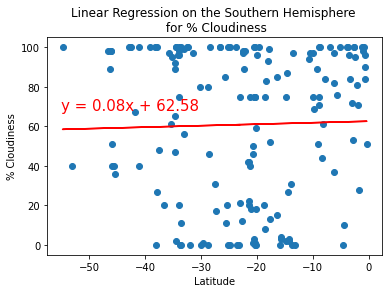

LinregressResult(slope=0.07503041121359053, intercept=62.5768449614894, rvalue=0.025945915778707612, pvalue=0.7415632491749571, stderr=0.22712481400887963, intercept_stderr=5.859812311516936)

In [116]:
# Linear Regression for Cloudiness  - Southern Hemi
x_val_south = southern_hemi_df["Lat"]
y_val_south = southern_hemi_df["Clouds"]
regress_values_s = linregress(x_val_south, y_val_south)

plot_linear_regression(x_val_south, y_val_south, "Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness", (-55, 68))
regress_values_s

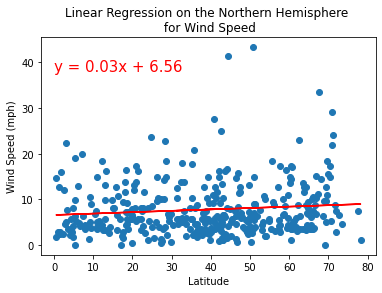

LinregressResult(slope=0.030519492304160883, intercept=6.563269040096733, rvalue=0.10276272112337344, pvalue=0.04824272848114336, stderr=0.015399708234836997, intercept_stderr=0.6684379850698864)

In [120]:
# 6.4.5. Find the Correlation btwn Lat and Wind Speed
# Linear Regression for Wind Speed  - Northern Hemi
x_val_north = northern_hemi_df["Lat"]
y_val_north = northern_hemi_df["Wind"]
regress_values_n = linregress(x_val_north, y_val_north)

plot_linear_regression(x_val_north, y_val_north, "Linear Regression on the Northern Hemisphere \n for Wind Speed", "Wind Speed (mph)", (0, 38))
regress_values_n

In [ ]:
# Linear Regression for Wind speed  - Southern Hemi
x_val_south = southern_hemi_df["Lat"]
y_val_south = southern_hemi_df["Wind"]
regress_values_s = linregress(x_val_south, y_val_south)

plot_linear_regression(x_val_south, y_val_south, "Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness", (-55, 68))
regress_values_s